In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [38]:
image = cv2.imread('lena_gray_512.tiff', cv2.IMREAD_GRAYSCALE)

In [39]:
def plot_histogram(equ):
    plt.figure(figsize=(12,6))
    plt.plot(equ, color = 'b')
    plt.title('Histograma Equalizado')
    plt.tight_layout()


In [40]:
def iniciar_histograma():
    hist_array=[]
    for i in range(0,256):
        hist_array.append(str(i))
        hist_array.append(0)
    
    hist_dct = {hist_array[i]: hist_array[i+1] for i in range(0, len(hist_array),2)}

    return hist_dct  

In [41]:
def count_intensity_values(hist, img):
    for row in img:
        for column in row:
            hist[str(int(column))] = hist[str(int(column))] + 1
        
        return hist

In [42]:
def plot_hist(hist, hist2=''):
    if hist2 != '':
        figure, axarr = plt.subplots(1,2, figsize=(20, 10))
        axarr[0].bar(hist.keys(), hist.values())
        axarr[1].bar(hist2.keys(), hist2.values())
    else:
        plt.bar(hist.keys(), hist.values())
        plt.xlabel("Níveis intensidade")
        ax = plt.gca()
        ax.axes.xaxis.set_ticks([])
        plt.grid(True)
        plt.show()

In [43]:
def get_hist_proba(hist, n_pixels):
    hist_proba = {}
    for i in range(0, 256):
        hist_proba[str(i)] = hist[str(i)] / n_pixels
    
    return hist_proba

In [44]:
def get_accumulated_proba(hist_proba): 
    acc_proba = {}
    sum_proba = 0
    
    for i in range(0, 256):
        if i == 0:
            pass
        else: 
            sum_proba += hist_proba[str(i - 1)]
            
        acc_proba[str(i)] = hist_proba[str(i)] + sum_proba
    return acc_proba

In [45]:
def get_new_gray_value(acc_proba):
    new_gray_value = {}
    
    for i in range(0, 256):
        new_gray_value[str(i)] = np.ceil(acc_proba[str(i)] * 255)
    return new_gray_value

In [46]:
def equalize_hist(img, new_gray_value):
    for row in range(img.shape[0]):
        for column in range(img.shape[1]):
            img[row][column] = new_gray_value[str(int(img[row] [column]))]
            
    return img

In [47]:
def plot_histograms(image, equalized_image, hist, equalized_hist):
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(equalized_image, cmap='gray')
    plt.title('Equalized Image')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    #plt.plot(hist, color='b')
    plt.bar(np.arange(len(hist)), hist, color='b')
    plt.title('Original Histogram')

    plt.subplot(2, 2, 4)
    #plt.plot(equalized_hist, color='b')
    plt.bar(np.arange(len(equalized_hist)), equalized_hist, color='b')
    plt.title('Equalized Histogram')

    plt.tight_layout()
    plt.show()


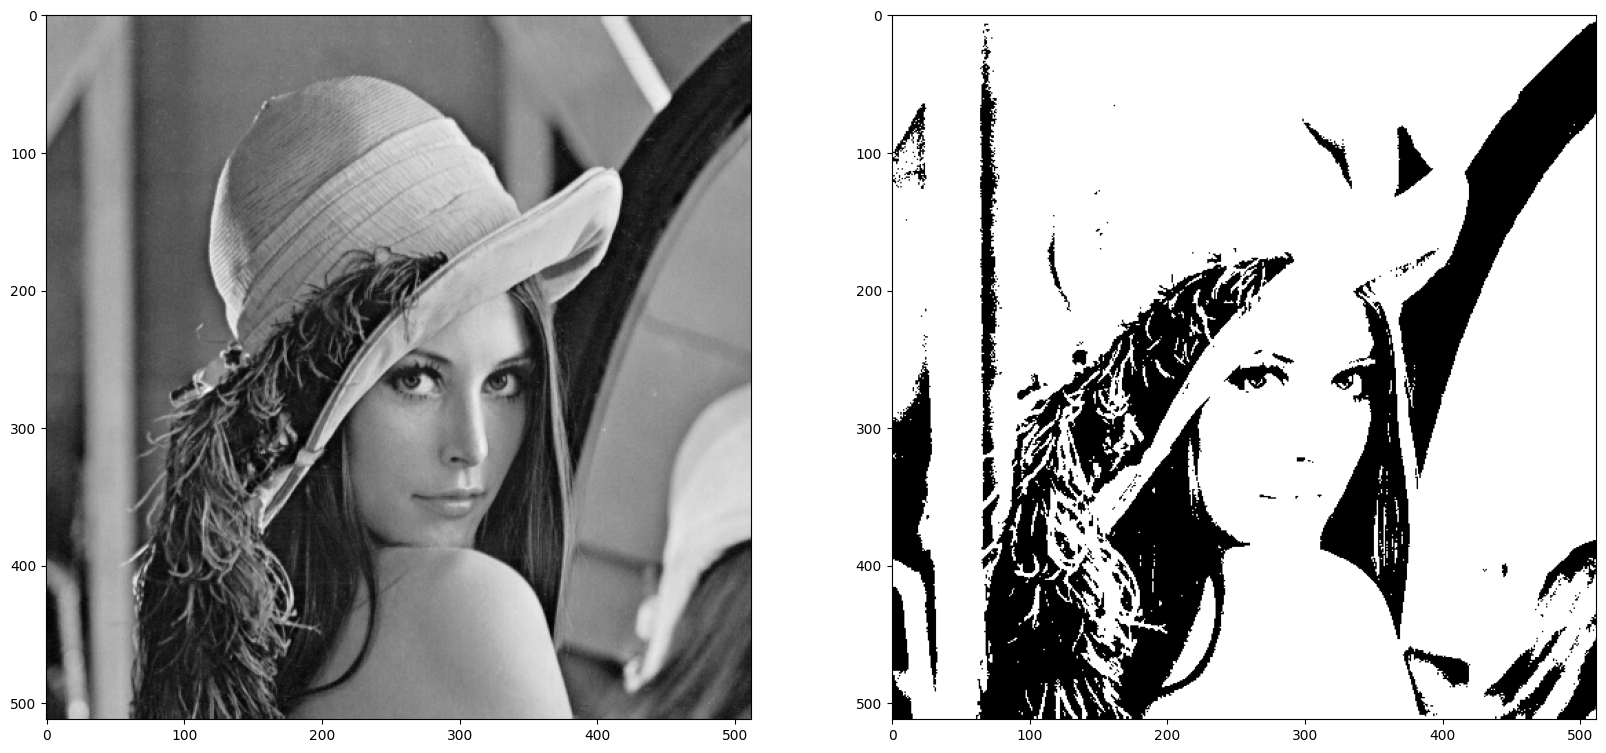

In [48]:

histogram = iniciar_histograma()
histogram = count_intensity_values(histogram, image)
n_pixels = image.shape[0] * image.shape[1]
hist_proba = get_hist_proba(histogram, n_pixels)
accumulated_proba = get_accumulated_proba(hist_proba)
new_gray_value = get_new_gray_value(accumulated_proba)
eq_img = equalize_hist(image.copy(), new_gray_value)
figure, axarr = plt.subplots(1,2, figsize=(20, 10))
axarr[0].imshow(image, cmap='gray')
axarr[1].imshow(eq_img, cmap='gray')
#plot_histograms(image, eq_img, histogram,new_gray_value)

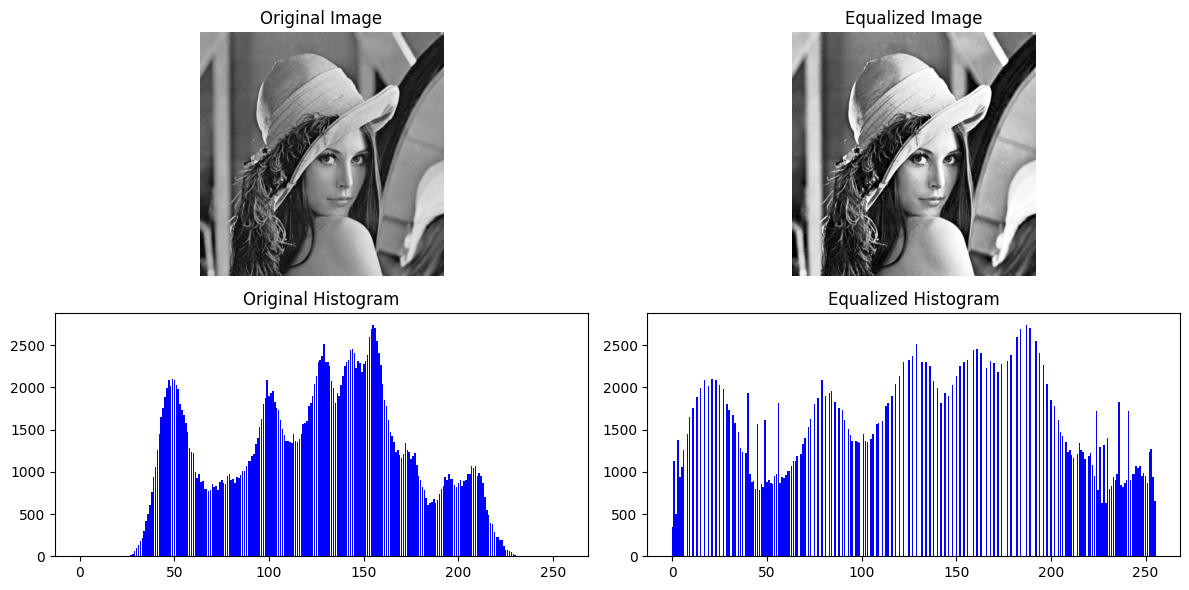

In [50]:
# Solução utilizando função equalizeHist da biblioteca OpenCV
# A função retorna uma imagem com o histograma ja equalizado.

equ = cv2.equalizeHist(image)
#res = np.hstack((image, equ))


hist_original, _ = np.histogram(image.flatten(), 256, [0,256])
equalized_hist, _ = np.histogram(equ.flatten(), 256, [0,256]) 

plot_histograms(image, equ, hist_original, equalized_hist)
